In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Algo de datos geograficos

## Cargamos un mapamundi que viene ya en la libreria geopandas

gpd.datasets.get_path('naturalearth_lowres')

In [204]:
base = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1  POLYGON ((33.90371119710453 -0.950000000000000...  
2  POLYGON ((-8.665589565454809 27.65642588959236...  
3  (POLYGON ((-122.84 49.00000000000011, -122.974...  
4  (POLYGON ((-122.84 49.00000000000011, -120 49....

### Graficamos

In [206]:
base.plot('gdp_md_est', cmap=plt.cm.Oranges)

Podemos aplicar las mismas estrategias de filtrado que ya conociamos para los dataframes comunes

In [207]:
ejes = base.plot()
base[(base.pop_est > 40e6) & (base.pop_est < 100e6)].plot(ax=ejes, color='r')
base[(base.pop_est > 100e6)].plot(ax=ejes, color='g')


In [208]:
# Si cargamos una tabla que tiene columnas con coordenadas podemos convertirlo a geodataframe asi
df = pd.read_csv('./bibliotecas-populares.csv')
df['coordenadas'] = list(zip(df.longitud, df.latitud))
df['coordenadas'] = df['coordenadas'].apply(Point)
bibliotecas = gpd.GeoDataFrame(df, geometry='coordenadas')

In [209]:
ejes = base[base.name == 'Argentina'].plot(figsize=(5,10))
bibliotecas.plot(ax=ejes, color='r', markersize=4)

## Cargar un GeoJSON

In [210]:
provincias = gpd.read_file('prov.json')

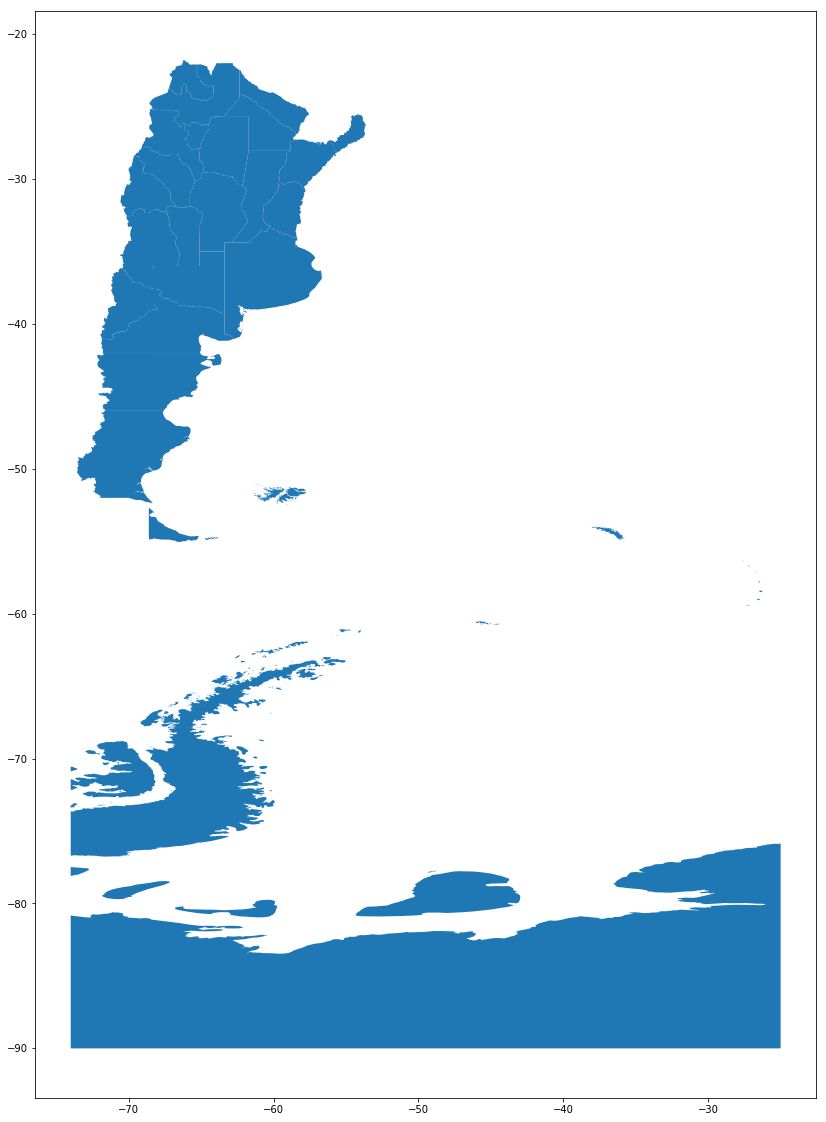

In [211]:
provincias.plot(figsize=(20,20))


In [212]:
provincias.IN1 = provincias.IN1.astype(int) # Convertimos los ids a int

In [214]:
# Podemos colorear las bibliotecas segun a que provincia pertenecen
ejes = base[~(base.name == 'Argentina')].plot(figsize=(20,20))
provincias.plot(ax=ejes, color='lightgray', edgecolor='white')
bibliotecas.plot('provincia', ax=ejes, markersize=15)
plt.xlim(-75, -50)
plt.ylim(-60, -20)


(-60, -20)

In [215]:
# Podemos agrupar y contar las bibliotecas por provincia
cant_biblio = bibliotecas.groupby('provincia_id')['espacio_cultural_id'].count()
cant_biblio = pd.DataFrame(cant_biblio)
cant_biblio.columns = ['cant_biblio']
cant_biblio

cant_biblio
provincia_id             
2                      43
6                     543
10                     38
14                    185
18                     58
22                     70
26                     48
30                     58
34                     25
38                     40
42                     72
46                     24
50                     67
54                     40
58                     70
62                     66
66                     64
70                     54
74                     45
78                     21
82                    273
86                     67
90                     37
94                      9

In [216]:
# Y luego agregar este dato como columna al dataframe de provincias
provincias = pd.merge(provincias, cant_biblio, left_on='IN1', right_index=True)
provincias

FNA              GNA  \
0                               Provincia de Misiones        Provincia   
1                               Provincia de San Luis        Provincia   
2                               Provincia de San Juan        Provincia   
3                             Provincia de Entre Ríos        Provincia   
4                             Provincia de Santa Cruz        Provincia   
5                              Provincia de Río Negro        Provincia   
6                                Provincia del Chubut        Provincia   
7                                Provincia de Córdoba        Provincia   
8                                Provincia de Mendoza        Provincia   
9                               Provincia de La Rioja        Provincia   
10                             Provincia de Catamarca        Provincia   
11                              Provincia de La Pampa        Provincia   
12                   Provincia de Santiago del Estero        Provincia   
13                            Provincia de Corrientes        Provincia   
14                              Provincia de Santa Fe        Provincia   
15                               Provincia de Tucumán        Provincia   
16                              Provincia del Neuquén        Provincia   
17                                 Provincia de Salta        Provincia   
18                                Provincia del Chaco        Provincia   
19                               Provincia de Formosa        Provincia   
20                                 Provincia de Jujuy        Provincia   
21                    Ciudad Autónoma de Buenos Aires  Ciudad Autónoma   
22                          Provincia de Buenos Aires        Provincia   
23  Provincia de Tierra del Fuego, Antártida e Isl...        Provincia   

                                                  NAM  SAG  IN1  \
0                                            Misiones  IGN   54   
1                                            San Luis  IGN   74   
2                                            San Juan  IGN   70   
3                                          Entre Ríos  IGN   30   
4                                          Santa Cruz  IGN   78   
5                                           Río Negro  IGN   62   
6                                              Chubut  IGN   26   
7                                             Córdoba  IGN   14   
8                                             Mendoza  IGN   50   
9                                            La Rioja  IGN   46   
10                                          Catamarca  IGN   10   
11                                           La Pampa  IGN   42   
12                                Santiago del Estero  IGN   86   
13                                         Corrientes  IGN   18   
14                                           Santa Fe  IGN   82   
15                                            Tucumán  IGN   90   
16                                            Neuquén  IGN   58   
17                                              Salta  IGN   66   
18                                              Chaco  IGN   22   
19                                            Formosa  IGN   34   
20                                              Jujuy  IGN   38   
21                    Ciudad Autónoma de Buenos Aires  IGN    2   
22                                       Buenos Aires  IGN    6   
23  Tierra del Fuego, Antártida e Islas del Atlánt...  IGN   94   

                                             geometry  cant_biblio  
0   (POLYGON ((-54.10905734599999 -25.539824101999...           40  
1   POLYGON ((-67.05547011299996 -31.8560526359999...           45  
2   POLYGON ((-67.32964173799996 -32.3588264019999...           54  
3   POLYGON ((-58.58137670599996 -30.1601009819999...           58  
4   (POLYGON ((-71.54708990899996 -45.999754001999...           21  
5   (POLYGON ((-64.76547241199995 -40.783512114999...           66  
6   (POLYGON ((-71.85479930299994 -43.49

In [218]:
# Y pintar a las provincias por su cantidad de bibliotecas
provincias.plot('cant_biblio', figsize=(10,10), cmap=plt.cm.cool)
plt.xlim(-75, -50)
plt.ylim(-60, -20)
plt.axis('off');

# Normalizacion de direcciones

Para esta parte de la clase utilizaremos el servicio de georreferenciacion provisto por la Direccion Nacional de Datos https://apis.datos.gob.ar/georef . Vamos a hacer solo un ejemplo sencillo para georreferenciar direcciones pero la API de georef se puede usar para muchas otras aplicaciones (vean la documentacion).

In [52]:
import requests # Usamos la libreria requests para hacer pedidos por http

In [162]:
direccion = 'Balcarce 55'
provincia = 'caba'
url_base ='https://apis.datos.gob.ar/georef/api/direcciones?direccion={}&provincia={}'
url = url_base.format(direccion, provincia) # Formateamos la url
r = requests.get(url)

In [164]:
r.json() # Veamos la respuesta

{'cantidad': 2,
 'direcciones': [{'altura': {'unidad': None, 'valor': 55},
   'calle': {'categoria': 'CALLE',
    'id': '0200701001910',
    'nombre': 'BALCARCE'},
   'calle_cruce_1': {'categoria': None, 'id': None, 'nombre': None},
   'calle_cruce_2': {'categoria': None, 'id': None, 'nombre': None},
   'departamento': {'id': '02007', 'nombre': 'Comuna 1'},
   'localidad_censal': {'id': '02000010',
    'nombre': 'Ciudad Autónoma de Buenos Aires'},
   'nomenclatura': 'BALCARCE 55, Comuna 1, Ciudad Autónoma de Buenos Aires',
   'piso': None,
   'provincia': {'id': '02', 'nombre': 'Ciudad Autónoma de Buenos Aires'},
   'ubicacion': {'lat': -34.60839211773153, 'lon': -58.37088175452773}},
  {'altura': {'unidad': None, 'valor': 55},
   'calle': {'categoria': 'CALLE',
    'id': '0204201005515',
    'nombre': 'FLORENCIO BALCARCE'},
   'calle_cruce_1': {'categoria': None, 'id': None, 'nombre': None},
   'calle_cruce_2': {'categoria': None, 'id': None, 'nombre': None},
   'departamento': {'id':

Vemos que hay dos respuestas compatibles con nuestra busqueda. Nos quedamos con la primera

In [166]:

data = r.json()
data['direcciones'][0]

{'altura': {'unidad': None, 'valor': 55},
 'calle': {'categoria': 'CALLE', 'id': '0200701001910', 'nombre': 'BALCARCE'},
 'calle_cruce_1': {'categoria': None, 'id': None, 'nombre': None},
 'calle_cruce_2': {'categoria': None, 'id': None, 'nombre': None},
 'departamento': {'id': '02007', 'nombre': 'Comuna 1'},
 'localidad_censal': {'id': '02000010',
  'nombre': 'Ciudad Autónoma de Buenos Aires'},
 'nomenclatura': 'BALCARCE 55, Comuna 1, Ciudad Autónoma de Buenos Aires',
 'piso': None,
 'provincia': {'id': '02', 'nombre': 'Ciudad Autónoma de Buenos Aires'},
 'ubicacion': {'lat': -34.60839211773153, 'lon': -58.37088175452773}}

# Extraer coordenadas de direcciones en una tabla
Supongamos que tenemos una tabla con direcciones y queremos saber sus coordenadas

In [181]:
# Creamos un pequeño dataframe falso
direccion = ['Belgrano 637',
'Balcarce 50',
'san martin 935']

df = pd.DataFrame(data=direccion,columns=['direccion'])
df['provincia'] = ['caba', 'santa fe', 'cordoba']
df

direccion provincia
0    Belgrano 637      caba
1     Balcarce 50  santa fe
2  san martin 935   cordoba

In [191]:
# Armamos una funcin que para cada fila haga una llamada a la api y extraiga las coordenadas
def interpretar_direccion(row):
    url_base ='https://apis.datos.gob.ar/georef/api/direcciones?direccion={}&provincia={}'
    r = requests.get(url_base.format(row.direccion, row.provincia))
    data = r.json()
    try:
        ubicacion = data['direcciones'][0]['ubicacion']
    except KeyError: 
        return pd.np.nan
    return Point((ubicacion['lon'], ubicacion['lat']))

In [192]:
# Aplicamos la funcion y convertimos el dataframe en un geodataframe
df['geometry'] = df.apply(interpretar_direccion,axis=1)
df = gpd.GeoDataFrame(df)

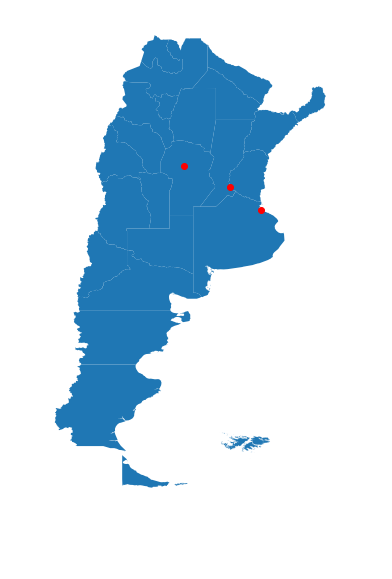

In [193]:
# Graficamos
ax = provincias.plot(figsize=(10,10))
df.plot(ax=ax,color='r')
plt.xlim(-75, -50)
plt.ylim(-60, -20)
plt.axis('off');